# Lab - working with online data 

In this Lab , you will load , clean and store online flights data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
%matplotlib inline

In [2]:
import requests
import json


# Load the data

In [3]:
r = requests.get("https://data.gov.il/api/3/action/datastore_search?resource_id=e83f763b-b7d7-479e-b172-ae981ddc6de5&limit=5000")

In [4]:
res = json.loads(r.content)

In [5]:
res

{'help': 'https://data.gov.il/api/3/action/help_show?name=datastore_search',
 'success': True,
 'result': {'include_total': True,
  'limit': 5000,
  'records_format': 'objects',
  'resource_id': 'e83f763b-b7d7-479e-b172-ae981ddc6de5',
  'total_estimation_threshold': None,
  'records': [{'_id': 1,
    'CHOPER': 'I2',
    'CHFLTN': '3980',
    'CHOPERD': 'IBERIA EXPRESS',
    'CHSTOL': '2024-04-01T17:35:00',
    'CHPTOL': '2024-04-01T17:19:00',
    'CHAORD': 'A',
    'CHLOC1': 'MAD',
    'CHLOC1D': 'MADRID',
    'CHLOC1TH': 'מדריד',
    'CHLOC1T': 'MADRID',
    'CHLOC1CH': 'ספרד',
    'CHLOCCT': 'SPAIN',
    'CHTERM': 3,
    'CHCINT': None,
    'CHCKZN': None,
    'CHRMINE': 'LANDED',
    'CHRMINH': 'נחתה'},
   {'_id': 2,
    'CHOPER': 'LY',
    'CHFLTN': '8388',
    'CHOPERD': 'EL AL ISRAEL AIRLINES',
    'CHSTOL': '2024-04-01T17:35:00',
    'CHPTOL': '2024-04-01T17:19:00',
    'CHAORD': 'A',
    'CHLOC1': 'MAD',
    'CHLOC1D': 'MADRID',
    'CHLOC1TH': 'מדריד',
    'CHLOC1T': 'MADRID',

In [6]:
df = pd.DataFrame(res['result']['records'])

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1756 entries, 0 to 1755
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   _id       1756 non-null   int64 
 1   CHOPER    1756 non-null   object
 2   CHFLTN    1756 non-null   object
 3   CHOPERD   1756 non-null   object
 4   CHSTOL    1756 non-null   object
 5   CHPTOL    1756 non-null   object
 6   CHAORD    1756 non-null   object
 7   CHLOC1    1756 non-null   object
 8   CHLOC1D   1756 non-null   object
 9   CHLOC1TH  1756 non-null   object
 10  CHLOC1T   1756 non-null   object
 11  CHLOC1CH  1756 non-null   object
 12  CHLOCCT   1756 non-null   object
 13  CHTERM    1756 non-null   int64 
 14  CHCINT    522 non-null    object
 15  CHCKZN    522 non-null    object
 16  CHRMINE   1756 non-null   object
 17  CHRMINH   1756 non-null   object
dtypes: int64(2), object(16)
memory usage: 247.1+ KB


## display the first rows 

### display the last 10 rows - What's wrong? 

In [8]:
df.tail(10)

_id CHOPER CHFLTN                      CHOPERD               CHSTOL  \
1746  1747     AR   7872   AEROLINEAS ARGENTINAS S.A.  2024-04-05T17:00:00   
1747  1748     B6   6456  JETBLUE AIRWAYS CORPORATION  2024-04-05T17:00:00   
1748  1749     DL   7431               DELTA AIRLINES  2024-04-05T17:00:00   
1749  1750     IB   2395                       IBERIA  2024-04-05T17:00:00   
1750  1751     LY    008        EL AL ISRAEL AIRLINES  2024-04-05T17:00:00   
1751  1752     LY    396        EL AL ISRAEL AIRLINES  2024-04-05T17:00:00   
1752  1753     TO   3459             TRANSAVIA FRANCE  2024-04-05T17:00:00   
1753  1754     LH    681                    LUFTHANSA  2024-04-05T17:05:00   
1754  1755     SN   7172            BRUSSELS AIRLINES  2024-04-05T17:05:00   
1755  1756     LX    252        SWISS INT`L  AIRLINES  2024-04-05T17:10:00   

                   CHPTOL CHAORD CHLOC1                 CHLOC1D  CHLOC1TH  \
1746  2024-04-05T17:00:00      A    MAD                  MADRID     מדריד   
1747  2024-04-05T17:00:00      A    JFK  NEW YORK - J.F.KENNEDY  ניו יורק   
1748  2024-04-05T17:00:00      A    JFK  NEW YORK - J.F.KENNEDY  ניו יורק   
1749  2024-04-05T17:00:00      A    MAD                  MADRID     מדריד   
1750  2024-04-05T17:00:00      A    JFK  NEW YORK - J.F.KENNEDY  ניו יורק   
1751  2024-04-05T17:00:00      A    MAD                  MADRID     מדריד   
1752  2024-04-05T17:00:00      D    ORY              PARIS-ORLY      פריס   
1753  2024-04-05T17:05:00      D    MUC                  MUNICH     מינכן   
1754  2024-04-05T17:05:00      D    MUC                  MUNICH     מינכן   
1755  2024-04-05T17:10:00      A    ZRH                  ZURICH     ציריך   

       CHLOC1T     CHLOC1CH        CHLOCCT  CHTERM CHCINT CHCKZN    CHRMINE  \
1746    MADRID         ספרד          SPAIN       3   None   None  NOT FINAL   
1747  NEW YORK  ארצות הברית  UNITED STATES       3   None   None  NOT FINAL   
1748  NEW YORK  ארצות הברית  UNITED STATES       3   None   None  NOT FINAL   
1749    MADRID         ספרד          SPAIN       3   None   None  NOT FINAL   
1750  NEW YORK  ארצות הברית  UNITED STATES       3   None   None  NOT FINAL   
1751    MADRID         ספרד          SPAIN       3   None   None  NOT FINAL   
1752     PARIS         צרפת         FRANCE       3   None   None    ON TIME   
1753    MUNICH       גרמניה        GERMANY       3   None   None    ON TIME   
1754    MUNICH       גרמניה        GERMANY       3   None   None    ON TIME   
1755    ZURICH        שוויץ    SWITZERLAND       3   None   None  NOT FINAL   

      CHRMINH  
1746  לא סופי  
1747  לא סופי  
1748  לא סופי  
1749  לא סופי  
1750  לא סופי  
1751  לא סופי  
1752     בזמן  
1753     בזמן  
1754     בזמן  
1755  לא סופי

# clean the data

how many rows contains empty strings for each Column? (use a for loop to display the column name and percentage)


In [9]:
countRows = df.shape[0]
listOfColumns = df.columns

for i in listOfColumns:
    sumOfNulls = 0
    sumOfNulls += df[i].isnull().sum()
    print(i  + '    ---> ' + str(round(sumOfNulls/countRows*100)) + '%')


_id    ---> 0%
CHOPER    ---> 0%
CHFLTN    ---> 0%
CHOPERD    ---> 0%
CHSTOL    ---> 0%
CHPTOL    ---> 0%
CHAORD    ---> 0%
CHLOC1    ---> 0%
CHLOC1D    ---> 0%
CHLOC1TH    ---> 0%
CHLOC1T    ---> 0%
CHLOC1CH    ---> 0%
CHLOCCT    ---> 0%
CHTERM    ---> 0%
CHCINT    ---> 70%
CHCKZN    ---> 70%
CHRMINE    ---> 0%
CHRMINH    ---> 0%


In [10]:
df = df.drop(columns=['CHCINT','CHCKZN'])

drop the empty rows  

In [11]:
for index, row in df.iterrows():
    countOfNullInRow = sum(row.isnull())
    #print(countOfNullInRow)                             # df.shape return [(number of column),(number of Rows)] as tuple
    if countOfNullInRow >= int((df.shape[1])/2):        # if number of null's in row is more then 50% or equal
        df.drop(index, inplace=True)                    # drop the row from the dataframe
    print(df)                                           # printing the new df
    

       _id CHOPER CHFLTN                CHOPERD               CHSTOL  \
0        1     I2   3980         IBERIA EXPRESS  2024-04-01T17:35:00   
1        2     LY   8388  EL AL ISRAEL AIRLINES  2024-04-01T17:35:00   
2        3     BZ    131      BLUE BIRD AIRWAYS  2024-04-01T17:20:00   
3        4     LH    687              LUFTHANSA  2024-04-01T16:30:00   
4        5     SN   7174      BRUSSELS AIRLINES  2024-04-01T16:30:00   
...    ...    ...    ...                    ...                  ...   
1751  1752     LY    396  EL AL ISRAEL AIRLINES  2024-04-05T17:00:00   
1752  1753     TO   3459       TRANSAVIA FRANCE  2024-04-05T17:00:00   
1753  1754     LH    681              LUFTHANSA  2024-04-05T17:05:00   
1754  1755     SN   7172      BRUSSELS AIRLINES  2024-04-05T17:05:00   
1755  1756     LX    252  SWISS INT`L  AIRLINES  2024-04-05T17:10:00   

                   CHPTOL CHAORD CHLOC1           CHLOC1D  CHLOC1TH  \
0     2024-04-01T17:19:00      A    MAD            MADRID     מד

       _id CHOPER CHFLTN                CHOPERD               CHSTOL  \
0        1     I2   3980         IBERIA EXPRESS  2024-04-01T17:35:00   
1        2     LY   8388  EL AL ISRAEL AIRLINES  2024-04-01T17:35:00   
2        3     BZ    131      BLUE BIRD AIRWAYS  2024-04-01T17:20:00   
3        4     LH    687              LUFTHANSA  2024-04-01T16:30:00   
4        5     SN   7174      BRUSSELS AIRLINES  2024-04-01T16:30:00   
...    ...    ...    ...                    ...                  ...   
1751  1752     LY    396  EL AL ISRAEL AIRLINES  2024-04-05T17:00:00   
1752  1753     TO   3459       TRANSAVIA FRANCE  2024-04-05T17:00:00   
1753  1754     LH    681              LUFTHANSA  2024-04-05T17:05:00   
1754  1755     SN   7172      BRUSSELS AIRLINES  2024-04-05T17:05:00   
1755  1756     LX    252  SWISS INT`L  AIRLINES  2024-04-05T17:10:00   

                   CHPTOL CHAORD CHLOC1           CHLOC1D  CHLOC1TH  \
0     2024-04-01T17:19:00      A    MAD            MADRID     מד

format the current date with underscore separation (%d_%m_%y)

In [12]:
formatted_current_date = dt.datetime.now().strftime("%d_%m_%Y")
formatted_current_date

'02_04_2024'

Drop the _id column 

In [13]:
df = df.drop(columns='_id')

save the raw data (add the current date to the file name) 

In [14]:


fileName = 'cleanData_' + formatted_current_date + '.csv'

df.to_csv('C:\\Python Project\\' + fileName, index=False, header=True)



select the airline code and name without duplicates (CHOPER,CHOPERD)

In [15]:
AirLineDF = df[['CHOPER','CHOPERD']].drop_duplicates()

In [16]:
AirLineDF

CHOPER                         CHOPERD
0        I2                  IBERIA EXPRESS
1        LY           EL AL ISRAEL AIRLINES
2        BZ               BLUE BIRD AIRWAYS
3        LH                       LUFTHANSA
4        SN               BRUSSELS AIRLINES
...     ...                             ...
923     RRR                 ROYAL AIR FORCE
956      RO  TAROM - ROMANIAN AIR TRANSPORT
978      HM                  AIR SEYCHELLES
1390     5F                          FLYONE
1483    MNE                    TOMONTENEGRO

[61 rows x 2 columns]

Load the file airlines.csv and merge it with a new data and save the file 'airline.csv'

In [17]:
import os
os.chdir('C:\\Python Project\\')

AirLineData = pd.read_csv('airlines.csv')[['CHOPER','CHOPERD']]

AirLineDF = AirLineDF[['CHOPER','CHOPERD']]
newAirLinelFile = pd.concat([AirLineData,AirLineDF], ignore_index=True).drop_duplicates()
newAirLinelFile.to_csv('C:\\Python Project\\airlines.csv',index=False)

In [18]:
newAirLinelFile

CHOPER                         CHOPERD
0       PC                PEGASUS AIRLINES
1       LY           EL AL ISRAEL AIRLINES
2       TK                TURKISH AIRLINES
3       LX           SWISS INT`L  AIRLINES
4       FB                   BULGARIA  AIR
..     ...                             ...
131     XR                 CORENDON EUROPE
146    ENT                   ENTER AIR- E4
169    RRR                 ROYAL AIR FORCE
170     RO  TAROM - ROMANIAN AIR TRANSPORT
173    MNE                    TOMONTENEGRO

[119 rows x 2 columns]

Drop the Airline name column 

In [19]:
df = df.drop(columns='CHOPERD')

Do the same task with airports (CHLOC1,CHLOC1D) and save the file 'airports.csv'

In [20]:
airPortFile = pd.read_csv('airports.csv')[['CHLOC1','CHLOC1D']]


AirPortDF = df[['CHLOC1','CHLOC1D']]

newApFile = pd.concat([airPortFile,AirPortDF], ignore_index=True).drop_duplicates()

newApFile.to_csv('C:\\Python Project\\airports.csv',index=False)

In [21]:
newApFile

CHLOC1                  CHLOC1D
0       SAW  ISTANBUL-SABIHA GOKCHEN
1       PRG            PRAGUE-RUZYNE
2       IST                 ISTANBUL
3       ZRH                   ZURICH
4       SOF                    SOFIA
...     ...                      ...
173     DUS               DUSSELDORF
659     SKD                SAMARKAND
1097    AKT                 AKROTIRI
1344    TIV                    TIVAT
1657    TGD                PODGORICA

[178 rows x 2 columns]

In [22]:
df = df.drop(columns='CHLOC1D')

drop the hebrew columns 'CHLOC1TH','CHLOC1CH','CHRMINH'

In [23]:
df = df.drop(columns=['CHLOC1TH','CHLOC1CH','CHRMINH'])

In [24]:
df

CHOPER CHFLTN               CHSTOL               CHPTOL CHAORD CHLOC1  \
0        I2   3980  2024-04-01T17:35:00  2024-04-01T17:19:00      A    MAD   
1        LY   8388  2024-04-01T17:35:00  2024-04-01T17:19:00      A    MAD   
2        BZ    131  2024-04-01T17:20:00  2024-04-01T17:28:00      A    FCO   
3        LH    687  2024-04-01T16:30:00  2024-04-01T17:28:00      D    FRA   
4        SN   7174  2024-04-01T16:30:00  2024-04-01T17:28:00      D    FRA   
...     ...    ...                  ...                  ...    ...    ...   
1751     LY    396  2024-04-05T17:00:00  2024-04-05T17:00:00      A    MAD   
1752     TO   3459  2024-04-05T17:00:00  2024-04-05T17:00:00      D    ORY   
1753     LH    681  2024-04-05T17:05:00  2024-04-05T17:05:00      D    MUC   
1754     SN   7172  2024-04-05T17:05:00  2024-04-05T17:05:00      D    MUC   
1755     LX    252  2024-04-05T17:10:00  2024-04-05T17:10:00      A    ZRH   

        CHLOC1T      CHLOCCT  CHTERM    CHRMINE  
0        MADRID        SPAIN       3     LANDED  
1        MADRID        SPAIN       3     LANDED  
2          ROME        ITALY       3     LANDED  
3     FRANKFURT      GERMANY       3   DEPARTED  
4     FRANKFURT      GERMANY       3   DEPARTED  
...         ...          ...     ...        ...  
1751     MADRID        SPAIN       3  NOT FINAL  
1752      PARIS       FRANCE       3    ON TIME  
1753     MUNICH      GERMANY       3    ON TIME  
1754     MUNICH      GERMANY       3    ON TIME  
1755     ZURICH  SWITZERLAND       3  NOT FINAL  

[1756 rows x 10 columns]

### rename the columns 

Change the PlanTime and ActualTime columns type to np.datetime64

In [25]:
df['CHSTOL'] = pd.to_datetime(df['CHSTOL'])
df['CHPTOL'] = pd.to_datetime(df['CHPTOL'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1756 entries, 0 to 1755
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   CHOPER   1756 non-null   object        
 1   CHFLTN   1756 non-null   object        
 2   CHSTOL   1756 non-null   datetime64[ns]
 3   CHPTOL   1756 non-null   datetime64[ns]
 4   CHAORD   1756 non-null   object        
 5   CHLOC1   1756 non-null   object        
 6   CHLOC1T  1756 non-null   object        
 7   CHLOCCT  1756 non-null   object        
 8   CHTERM   1756 non-null   int64         
 9   CHRMINE  1756 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 137.3+ KB


Save the clean data 

In [26]:
df

CHOPER CHFLTN              CHSTOL              CHPTOL CHAORD CHLOC1  \
0        I2   3980 2024-04-01 17:35:00 2024-04-01 17:19:00      A    MAD   
1        LY   8388 2024-04-01 17:35:00 2024-04-01 17:19:00      A    MAD   
2        BZ    131 2024-04-01 17:20:00 2024-04-01 17:28:00      A    FCO   
3        LH    687 2024-04-01 16:30:00 2024-04-01 17:28:00      D    FRA   
4        SN   7174 2024-04-01 16:30:00 2024-04-01 17:28:00      D    FRA   
...     ...    ...                 ...                 ...    ...    ...   
1751     LY    396 2024-04-05 17:00:00 2024-04-05 17:00:00      A    MAD   
1752     TO   3459 2024-04-05 17:00:00 2024-04-05 17:00:00      D    ORY   
1753     LH    681 2024-04-05 17:05:00 2024-04-05 17:05:00      D    MUC   
1754     SN   7172 2024-04-05 17:05:00 2024-04-05 17:05:00      D    MUC   
1755     LX    252 2024-04-05 17:10:00 2024-04-05 17:10:00      A    ZRH   

        CHLOC1T      CHLOCCT  CHTERM    CHRMINE  
0        MADRID        SPAIN       3     LANDED  
1        MADRID        SPAIN       3     LANDED  
2          ROME        ITALY       3     LANDED  
3     FRANKFURT      GERMANY       3   DEPARTED  
4     FRANKFURT      GERMANY       3   DEPARTED  
...         ...          ...     ...        ...  
1751     MADRID        SPAIN       3  NOT FINAL  
1752      PARIS       FRANCE       3    ON TIME  
1753     MUNICH      GERMANY       3    ON TIME  
1754     MUNICH      GERMANY       3    ON TIME  
1755     ZURICH  SWITZERLAND       3  NOT FINAL  

[1756 rows x 10 columns]

In [27]:

df.columns = ['Airline','FlightNum','PlanTime','ActualTime','Direction','Airport','City','Country','Terminal','Status']

df.to_csv('C:\\Python Project\\' + fileName, index=False, header=True)



In [28]:
df


Airline FlightNum            PlanTime          ActualTime Direction  \
0         I2      3980 2024-04-01 17:35:00 2024-04-01 17:19:00         A   
1         LY      8388 2024-04-01 17:35:00 2024-04-01 17:19:00         A   
2         BZ       131 2024-04-01 17:20:00 2024-04-01 17:28:00         A   
3         LH       687 2024-04-01 16:30:00 2024-04-01 17:28:00         D   
4         SN      7174 2024-04-01 16:30:00 2024-04-01 17:28:00         D   
...      ...       ...                 ...                 ...       ...   
1751      LY       396 2024-04-05 17:00:00 2024-04-05 17:00:00         A   
1752      TO      3459 2024-04-05 17:00:00 2024-04-05 17:00:00         D   
1753      LH       681 2024-04-05 17:05:00 2024-04-05 17:05:00         D   
1754      SN      7172 2024-04-05 17:05:00 2024-04-05 17:05:00         D   
1755      LX       252 2024-04-05 17:10:00 2024-04-05 17:10:00         A   

     Airport       City      Country  Terminal     Status  
0        MAD     MADRID        SPAIN         3     LANDED  
1        MAD     MADRID        SPAIN         3     LANDED  
2        FCO       ROME        ITALY         3     LANDED  
3        FRA  FRANKFURT      GERMANY         3   DEPARTED  
4        FRA  FRANKFURT      GERMANY         3   DEPARTED  
...      ...        ...          ...       ...        ...  
1751     MAD     MADRID        SPAIN         3  NOT FINAL  
1752     ORY      PARIS       FRANCE         3    ON TIME  
1753     MUC     MUNICH      GERMANY         3    ON TIME  
1754     MUC     MUNICH      GERMANY         3    ON TIME  
1755     ZRH     ZURICH  SWITZERLAND         3  NOT FINAL  

[1756 rows x 10 columns]

In [29]:
df.value_counts('Status')

Status
ON TIME      660
NOT FINAL    643
LANDED       217
DEPARTED     213
FINAL         14
LANDING        5
CANCELED       4
Name: count, dtype: int64

update the file final.csv with departed, landed and canceled flights only

In [30]:
finalFile = pd.read_csv('final.csv')


newFinalFile = pd.concat([finalFile,df], ignore_index=True).query('Status in("DEPARTED", "LANDED" , "CANCELED")')

newFinalFile.to_csv('C:\\Python Project\\final.csv', index=False)

In [31]:
newFinalFile

Airline FlightNum             PlanTime           ActualTime Direction  \
0         LY       842  2022-03-07 16:00:00  2022-03-07 17:04:00         A   
1         AA       146  2022-03-07 17:15:00  2022-03-07 17:05:00         A   
2        USF     RCH18  2022-03-07 17:15:00  2022-03-07 17:05:00         D   
3        AHS     N120L  2022-03-07 16:30:00  2022-03-07 17:08:00         D   
4         LH       687  2022-03-07 16:25:00  2022-03-07 17:09:00         D   
...      ...       ...                  ...                  ...       ...   
6936      AM      7877  2024-04-02 16:55:00  2024-04-02 17:12:00         D   
6937      LY       317  2024-04-02 16:55:00  2024-04-02 17:12:00         D   
7586      6H       585  2024-04-04 06:25:00  2024-04-04 06:25:00         D   
7637      6H       586  2024-04-04 09:35:00  2024-04-04 09:35:00         A   
7678      LY      5108  2024-04-04 12:15:00  2024-04-04 12:15:00         A   

     Airport       City         Country  Terminal    Status  
0        LGG      LIEGE         BELGIUM         3    LANDED  
1        JFK   NEW YORK   UNITED STATES         3    LANDED  
2        RMS   RAMSTEIN         GERMANY         3  CANCELED  
3        TEB  TETERBORO   UNITED STATES         3  DEPARTED  
4        FRA  FRANKFURT         GERMANY         3  DEPARTED  
...      ...        ...             ...       ...       ...  
6936     LHR     LONDON  UNITED KINGDOM         3  DEPARTED  
6937     LHR     LONDON  UNITED KINGDOM         3  DEPARTED  
7586     LCA    LARNACA          CYPRUS         3  CANCELED  
7637     LCA    LARNACA          CYPRUS         3  CANCELED  
7678     TBS    TBILISI         GEORGIA         3  CANCELED  

[6937 rows x 10 columns]

Add a new column for total delay in minutes

In [32]:


newFinalFile['ActualTime'] = pd.to_datetime(newFinalFile['ActualTime'])
newFinalFile['PlanTime'] = pd.to_datetime(newFinalFile['PlanTime'])

newFinalFile['Total_Delay'] = (newFinalFile['ActualTime'] - newFinalFile['PlanTime']).dt.total_seconds() / 60

newFinalFile

Airline FlightNum            PlanTime          ActualTime Direction  \
0         LY       842 2022-03-07 16:00:00 2022-03-07 17:04:00         A   
1         AA       146 2022-03-07 17:15:00 2022-03-07 17:05:00         A   
2        USF     RCH18 2022-03-07 17:15:00 2022-03-07 17:05:00         D   
3        AHS     N120L 2022-03-07 16:30:00 2022-03-07 17:08:00         D   
4         LH       687 2022-03-07 16:25:00 2022-03-07 17:09:00         D   
...      ...       ...                 ...                 ...       ...   
6936      AM      7877 2024-04-02 16:55:00 2024-04-02 17:12:00         D   
6937      LY       317 2024-04-02 16:55:00 2024-04-02 17:12:00         D   
7586      6H       585 2024-04-04 06:25:00 2024-04-04 06:25:00         D   
7637      6H       586 2024-04-04 09:35:00 2024-04-04 09:35:00         A   
7678      LY      5108 2024-04-04 12:15:00 2024-04-04 12:15:00         A   

     Airport       City         Country  Terminal    Status  Total_Delay  
0        LGG      LIEGE         BELGIUM         3    LANDED         64.0  
1        JFK   NEW YORK   UNITED STATES         3    LANDED        -10.0  
2        RMS   RAMSTEIN         GERMANY         3  CANCELED        -10.0  
3        TEB  TETERBORO   UNITED STATES         3  DEPARTED         38.0  
4        FRA  FRANKFURT         GERMANY         3  DEPARTED         44.0  
...      ...        ...             ...       ...       ...          ...  
6936     LHR     LONDON  UNITED KINGDOM         3  DEPARTED         17.0  
6937     LHR     LONDON  UNITED KINGDOM         3  DEPARTED         17.0  
7586     LCA    LARNACA          CYPRUS         3  CANCELED          0.0  
7637     LCA    LARNACA          CYPRUS         3  CANCELED          0.0  
7678     TBS    TBILISI         GEORGIA         3  CANCELED          0.0  

[6937 rows x 11 columns]

What is the average delay for departed flights

In [33]:

newFinalFile.loc[(newFinalFile['Total_Delay'] >= 0) & (newFinalFile['Status'] == "DEPARTED"), 'Total_Delay'].mean().round(2)


27.38

Display total delay distribution 

In [34]:
import matplotlib.pyplot as plt
plt.style.available
plt.style.use('seaborn-v0_8-pastel')

AverageDelay = newFinalFile.groupby('Airline')['Total_Delay'].mean().sort_values(ascending=False).round(0)


sumOfStatusByTerminal = newFinalFile.groupby('Terminal')[['Airline','Total_Delay']].value_counts().head(10)



In [35]:
sumOfStatusByTerminal

Terminal  Airline  Total_Delay
1         6H        0.0           10
                    16.0           2
          IZ        13.0           2
                    14.0           2
                    31.0           2
          5W        44.0           1
          6H       -19.0           1
                   -17.0           1
                   -15.0           1
                   -13.0           1
Name: count, dtype: int64

In [36]:
AverageDelay

Airline
AHS    183.0
WZ      68.0
DN      46.0
AI      44.0
HU      38.0
       ...  
FX     -16.0
VS     -18.0
702    -28.0
341    -74.0
LAU    -90.0
Name: Total_Delay, Length: 101, dtype: float64

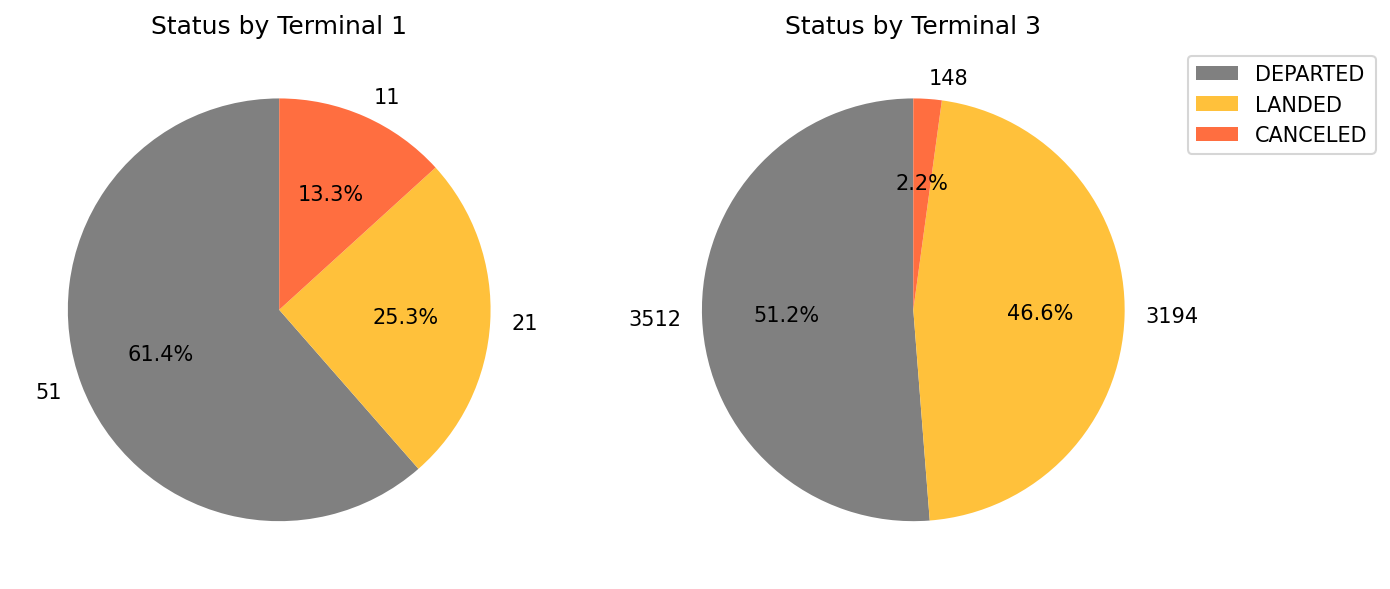

In [46]:
statusbyTerminal1 = newFinalFile.query('Terminal == 1')['Status'].value_counts()
statusbyTerminal3 = newFinalFile.query('Terminal == 3')['Status'].value_counts()    


#  יצירת הגרף עם 2 פאים בגדלים שוים 
fig, axs = plt.subplots(1, 2,width_ratios=[1,1], figsize=(10,6),dpi=150)

# יצירת הפאי הראשון
axs[0].pie(statusbyTerminal1, labels=statusbyTerminal1, autopct='%1.1f%%', radius = 1, startangle=90, colors=['gray', '#ffc13b', '#ff6e40'])
axs[0].set_title('Status by Terminal 1')


# יצירת הפאי השני
axs[1].pie(statusbyTerminal3, labels=statusbyTerminal3, autopct='%1.1f%%', radius = 1,  startangle=90, colors=['gray', '#ffc13b', '#ff6e40'])
axs[1].set_title('Status by Terminal 3')


#יצירת מקרא לגרב לפי האינדקסים של הגרף 
#מציין את מיקום המקרא ביחס לגרף  bbox_to_anchor המשתנה
plt.legend(statusbyTerminal1.index,  bbox_to_anchor=(1, 1))


# הצגת הגרף
plt.show()

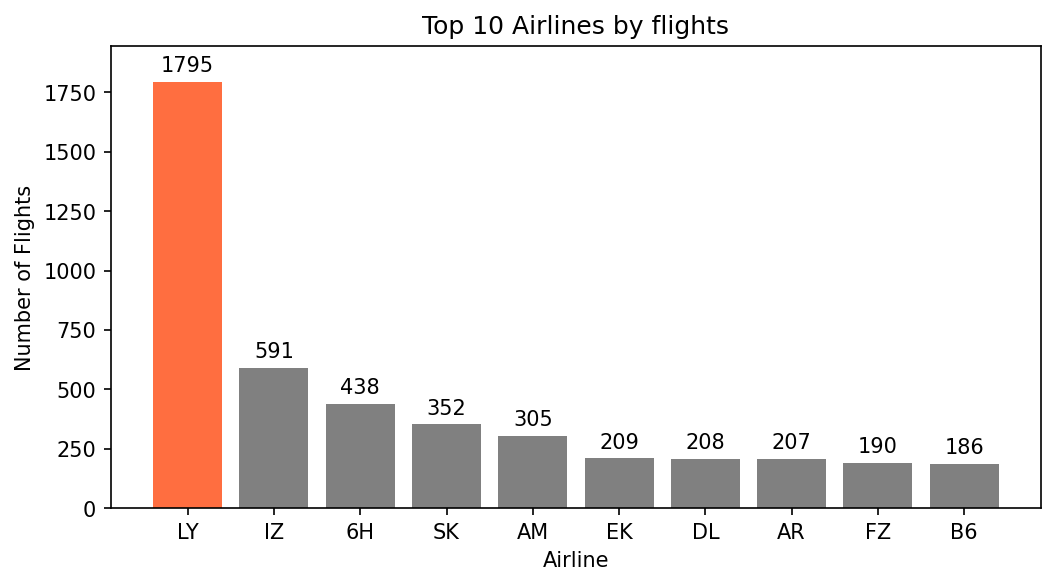

In [38]:


# משתנה לקביעת כמות החברות 
NumberOfAirLines= 10

# קביעת המדדים לצירי הגרף
x_axis = newFinalFile['Airline'].value_counts().index[:NumberOfAirLines]
x_axis2 = newFinalFile['Airline'].value_counts().index[:-NumberOfAirLines]
y_axis = newFinalFile['Airline'].value_counts().values[:NumberOfAirLines]


# קביעת צבעים לגרף לפי תנאי
colors = ['#ff6e40' if y >= max(y_axis) else 'gray' for y in y_axis]

# יצירת גרף
plt.figure(figsize=(8,4) , dpi=150)
# (padding) יצירת סוג הגרף, הצבעים ומיקום הטקסט ביחס לכל גרף
plt.bar_label(plt.bar(x_axis, y_axis, width=0.8, color=colors),padding=3)
#  NumberOfAirLines כותרת לגרף ועל פי המשתנה 
plt.title('Top ' + str(NumberOfAirLines) + ' Airlines by flights')
# יצירת כותרות לגרף ולצירים השונים
plt.xlabel('selectd_values')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')

# קביעת גבולות הגרף
plt.ylim(0, max(y_axis) +150)

# הצגת הגרף
plt.show()

In [39]:
x_axis2

Index(['LY', 'IZ', '6H', 'SK', 'AM', 'EK', 'DL', 'AR', 'FZ', 'B6', 'BZ', 'AA',
       'TP', 'UA', 'IB', 'A3', 'JU', 'ET', 'LH', 'LO', 'SN', 'WZ', 'OS', 'W6',
       'FB', 'U8', 'QF', 'TG', 'LX', 'NH', 'QS', 'W4', 'AF', 'S7', 'VN', 'FR',
       'QAS', 'A4', 'TO', 'CY', 'AZ', 'W9', 'TK', 'LAU', 'EJU', 'AC', 'UX',
       'AI', 'AHS', 'H7', 'EW', 'EY', 'PC', 'J2', 'HU', 'RO', '5F', 'KL', 'HY',
       'EZS', '311', 'SU', 'BA', 'DN', 'QY', 'OK', 'USF', 'VY', 'EZY', 'MNB',
       '3U', 'NJE', '5W', 'ENT', '9U', 'I2', 'B2', 'KQ', 'GF', '460', '3V',
       '5X', 'A9', 'PQ', 'N4', '700', 'TWI', 'XC', '493', 'FX', 'VS'],
      dtype='object', name='Airline')

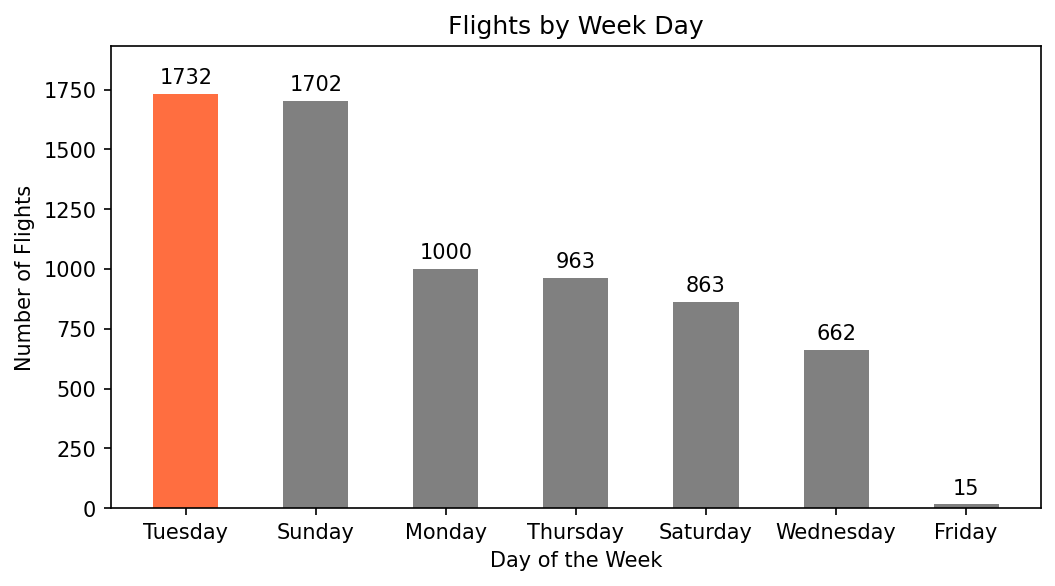

In [40]:

# קביעת המדדים לצירי הגרף

x_axis = newFinalFile['PlanTime'].dt.day_name().value_counts().index
y_axis = newFinalFile['PlanTime'].dt.day_name().value_counts().values

# קביעת צבעים לגרף לפי תנאי
colors = ['#ff6e40' if y >= max(y_axis) else 'gray' for y in y_axis]

# יצירת גרף
plt.figure(figsize=(8,4) , dpi=150)

# (padding) יצירת סוג הגרף, הצבעים ומיקום הטקסט ביחס לכל גרף
plt.bar_label(plt.bar(x_axis, y_axis, width=0.5, color=colors),padding=3)
#plt.bar_label(plt.bar(x_axis2, y_axis, width=0.5, color=colors),padding=3)
#plt.bar_label(plt.bar(x_axis3, y_axis, width=0.5, color=colors),padding=3)

# יצירת כותרות לגרף ולצירים השונים
plt.title('Flights by Week Day')
plt.xticks(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')

# קביעת גבולות הגרף
plt.ylim(0, max(y_axis) + 200)

# הצגת הגרף
plt.show()

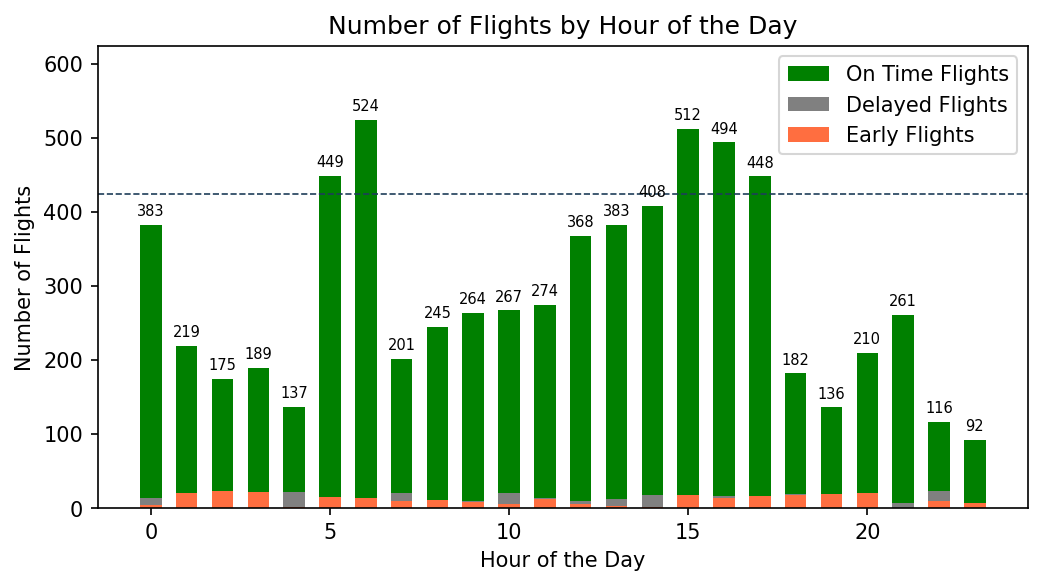

In [41]:

# קביעת המדדים לצירי הגרף
FlightsByHour = newFinalFile['PlanTime'].dt.hour.value_counts().index
NumberOfFlights = newFinalFile['PlanTime'].dt.hour.value_counts().values
delayedflightsByHour = newFinalFile.query('Total_Delay > 0')['PlanTime'].dt.hour.value_counts().index
erlyflightsByHour = newFinalFile.query('Total_Delay < 0')['PlanTime'].dt.hour.value_counts().index
ontimeflightsByHour = newFinalFile.query('Total_Delay == 0')['PlanTime'].dt.hour.value_counts().index


#קביעת תנאי לצבעים
colorChange = max(NumberOfFlights) - 100

# Define colors based on condition
colors = ['#ff6e40' if y >= colorChange else 'gray' for y in NumberOfFlights]

# יצירת גרף
plt.figure(figsize=(8,4) , dpi=150)

# יצירת קו על פי התנאי שקובע את הצבע
plt.axhline(colorChange, color='#1e3d59', linestyle='--', linewidth=0.8)

# (padding) יצירת סוג הגרף, הצבעים ומיקום הטקסט ביחס לכל גרף

plt.bar_label(plt.bar(FlightsByHour, NumberOfFlights, width=0.6, color='green', label='On Time Flights'),padding=3, fontsize=7)
#plt.bar(FlightsByHour, FlightsByHour, width=0.6, color='gray', label='On Time Flights')
plt.bar(FlightsByHour, delayedflightsByHour, width=0.6, color='gray', label='Delayed Flights')
plt.bar(FlightsByHour, erlyflightsByHour,  width=0.6, color='#ff6e40', label='Early Flights')



# יצירת כותרות לגרף ולצירים השונים
plt.title('Number of Flights by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Flights')

# קביעת גבולות הגרף
plt.ylim(0, max(NumberOfFlights)+100)


# יצירת מקרא לגרף ולפי האינדקסים של הגרף ולפי מיקום נבחר
plt.legend(loc='upper right')

# הצגת הגרף
plt.show()


In [42]:
FlightsByHour

Index([ 6, 15, 16,  5, 17, 14, 13,  0, 12, 11, 10,  9, 21,  8,  1, 20,  7,  3,
       18,  2,  4, 19, 22, 23],
      dtype='int32', name='PlanTime')

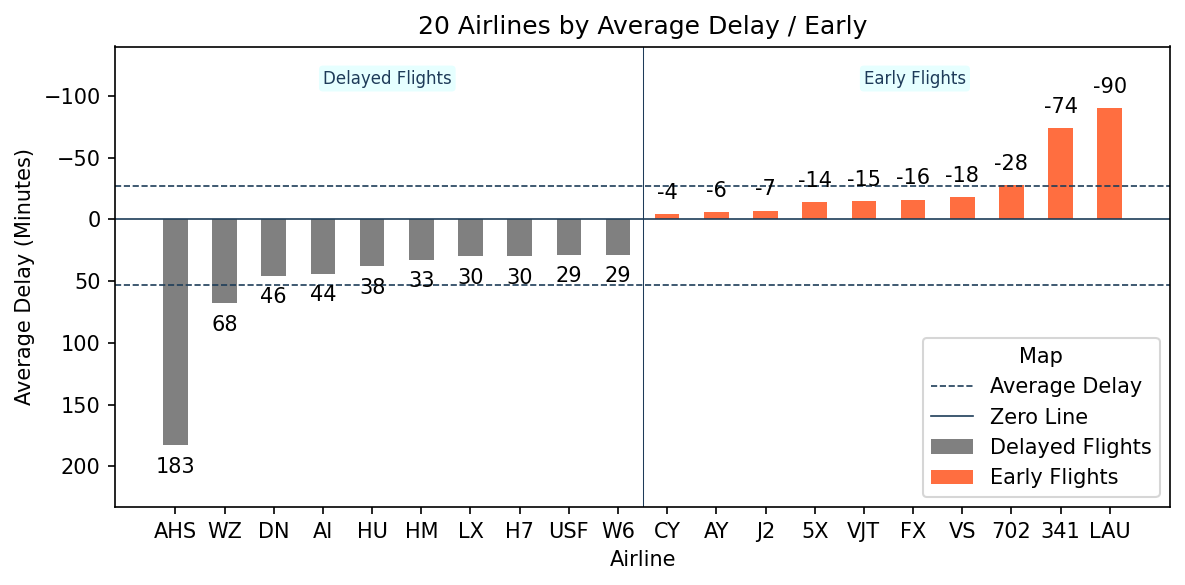

In [43]:
# משתנה לקביעת כמות החברות 
numberOfshow = 10

# קביעת המדדים לצירי הגרף
# 
AverageDelay = newFinalFile.groupby('Airline')['Total_Delay'].mean().sort_values(ascending=False).round(0)


# השמה בתוך משתנה את החברות עם הכי הרבה עיכובים ולפי משתנה של כמות החברות
Top10AirlineAverageDelay = AverageDelay.head(numberOfshow)
# השמה בתוך משתנה את החברות שהכי מקדימות את הטיסות ולפי משתנה של כמות החברות
Bottom10AirlineAverageDelay = AverageDelay.tail(numberOfshow)

# חיבור של שני המשתנים למשתנה אחד
combineAirlineAverageDelay = pd.concat([Top10AirlineAverageDelay,Bottom10AirlineAverageDelay], ignore_index=True)

# יצירת גרף
plt.figure(figsize=(8,4) , dpi=150)
plt.axhline(Top10AirlineAverageDelay.mean(), color='#1e3d59', linestyle='--', linewidth=0.8)
plt.axhline(Bottom10AirlineAverageDelay.mean(), color='#1e3d59', linestyle='--', linewidth=0.8, label='Average Delay')

# יצירת קו אופקי 0 בצבע עובי וסיגנון 
plt.axhline(0, color='#1e3d59', linestyle='-', linewidth=0.8, label='Zero Line')

# יצירת קו אנכי במיקום 9.5 ביחס לגרף ובצבע ועובי נבחר
plt.axvline(x = 9.5, color = '#1e3b59', linewidth=0.5)

# יצירת 2 טקסטים בתוך מסגרת ולפי מיקום צבע וגודל טקסט נבחר
# תיבת הטקסט תהיה בצבע וגודל נבחר ובמיקום נבחר
plt.text(14, -110, 'Early Flights', fontsize=8, color='#1e3b59',bbox=dict(boxstyle="round",ec=(1., 1, 1),fc=(0.9, 1, 1)))
plt.text(3, -110, 'Delayed Flights', fontsize=8, color='#1e3b59',bbox=dict(boxstyle="round",ec=(1., 1, 1),fc=(0.9, 1, 1)))

# (padding) יצירת סוג הגרפים, הצבעים ומיקום הטקסט ביחס לכל גרף
plt.bar_label(plt.bar(Top10AirlineAverageDelay.index, Top10AirlineAverageDelay.values, width=0.5, color='gray', label='Delayed Flights'), padding=-15)
plt.bar_label(plt.bar(Bottom10AirlineAverageDelay.index, Bottom10AirlineAverageDelay.values, width=0.5, color='#ff6e40', label='Early Flights'), padding=-15)

# יצירת כותרת לגרף ולצירים השונים
plt.title(str(numberOfshow*2) + ' Airlines by Average Delay / Early')
plt.xlabel('Airline')
plt.ylabel('Average Delay (Minutes)')

# קביעת גבולות הגרף
plt.ylim(max(Top10AirlineAverageDelay) +50, min(Bottom10AirlineAverageDelay)-50)

# יצירת מקרא לגרף ולפי האינדקסים של הגרף ולפי מיקום נבחר
plt.legend(title='Map', loc='lower right')

# כאשר יש יותר מגרף אחד או שהגרף גדול מידיי נצטרך להשתמש בפקודה זו כדי למנוע חיתוך של הגרף וכדומה
plt.tight_layout()

# שמירת הגרף כתמונה בסיפריית הפרוייקט (PNG format)
plt.savefig('visualization.png')

# הצגת הגרף
plt.show()